In [15]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler , LabelEncoder
from sklearn.ensemble import ExtraTreesClassifier

In [16]:
test_set = pd.read_csv('dataset/test_set_features.csv')
features = pd.read_csv('dataset/training_set_features.csv')
labels = pd.read_csv('dataset/training_set_labels.csv')

In [ ]:
h1n1_vacc_dist = labels.groupby('h1n1_vaccine').size()
plt.bar(['0','1'],h1n1_vacc_dist, align='center', alpha=0.5)
plt.show()


In [ ]:
seasonal_vacc_dist = labels.groupby('seasonal_vaccine').size()
plt.bar(['0','1'],seasonal_vacc_dist, align='center', alpha=0.5)
plt.show()

In [17]:
na_feature = features.isna().sum()
na_feature

respondent_id                      0
h1n1_concern                      92
h1n1_knowledge                   116
behavioral_antiviral_meds         71
behavioral_avoidance             208
behavioral_face_mask              19
behavioral_wash_hands             42
behavioral_large_gatherings       87
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_h1n1                2160
doctor_recc_seasonal            2160
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
health_insurance               12274
opinion_h1n1_vacc_effective      391
opinion_h1n1_risk                388
opinion_h1n1_sick_from_vacc      395
opinion_seas_vacc_effective      462
opinion_seas_risk                514
opinion_seas_sick_from_vacc      537
age_group                          0
education                       1407
race                               0
sex                                0
income_poverty                  4423
m

In [18]:
# For float fill missing values with the mean
features = features.fillna(features.mean(numeric_only= True))
features = round(features)

# For string fill missing value with 'No Category'

features = features.fillna('NULL')

In [19]:
enc = LabelEncoder()

In [20]:
features.age_group = enc.fit_transform(features.age_group)
features.education = enc.fit_transform(features.education)
features.race = enc.fit_transform(features.race)
features.sex = enc.fit_transform(features.sex)
features.income_poverty = enc.fit_transform(features.income_poverty)
features.marital_status = enc.fit_transform(features.marital_status)
features.rent_or_own = enc.fit_transform(features.rent_or_own)
features.employment_status = enc.fit_transform(features.employment_status)
features.hhs_geo_region = enc.fit_transform(features.hhs_geo_region)
features.census_msa = enc.fit_transform(features.census_msa)
features.employment_industry = enc.fit_transform(features.employment_industry)
features.employment_occupation = enc.fit_transform(features.employment_occupation)

In [21]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   h1n1_concern                 26707 non-null  float64
 2   h1n1_knowledge               26707 non-null  float64
 3   behavioral_antiviral_meds    26707 non-null  float64
 4   behavioral_avoidance         26707 non-null  float64
 5   behavioral_face_mask         26707 non-null  float64
 6   behavioral_wash_hands        26707 non-null  float64
 7   behavioral_large_gatherings  26707 non-null  float64
 8   behavioral_outside_home      26707 non-null  float64
 9   behavioral_touch_face        26707 non-null  float64
 10  doctor_recc_h1n1             26707 non-null  float64
 11  doctor_recc_seasonal         26707 non-null  float64
 12  chronic_med_condition        26707 non-null  float64
 13  child_under_6_mo

In [22]:
labels = labels.drop(columns=['respondent_id'])
labels

,h1n1_vaccine,seasonal_vaccine
0,0,0
1,0,1
2,0,0
3,0,1
4,0,0
...,...,...
26702,0,0
26703,0,0
26704,0,1
26705,0,0


[0.03973363 0.02985573 0.0259033  0.00796759 0.01720286 0.0096984
 0.01215717 0.01816634 0.01836175 0.01677426 0.05258394 0.06449761
 0.01742745 0.01048655 0.01763271 0.00755159 0.04072269 0.04405321
 0.02992983 0.05722704 0.07220537 0.02979899 0.04734279 0.02922444
 0.01951408 0.02083091 0.02677766 0.01947502 0.01916294 0.01638488
 0.03712014 0.02877596 0.02512561 0.0212449  0.02460227 0.02448039]


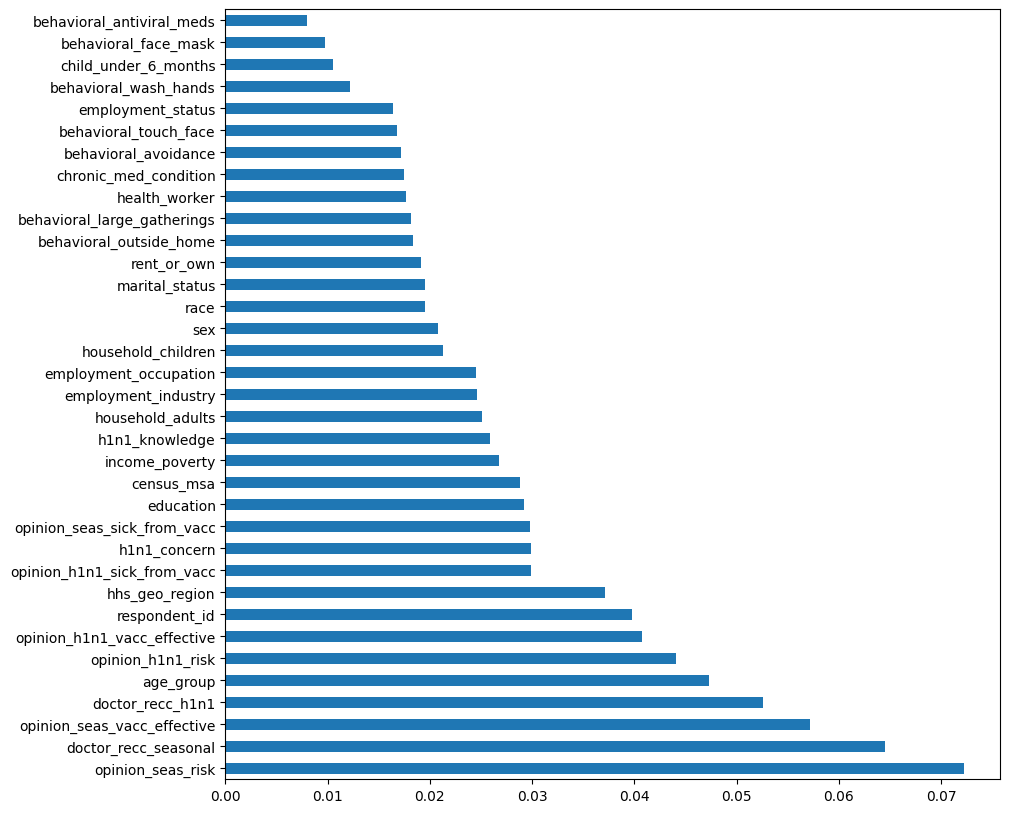

In [23]:
model = ExtraTreesClassifier()
model.fit(features,labels)
print(model.feature_importances_)
plt.figure(figsize=(10,10))
feat_importances = pd.Series(model.feature_importances_, index=features.columns)
feat_importances.nlargest(35).plot(kind='barh')
plt.show()

In [25]:
features = features.drop(columns=['opinion_seas_risk', 'doctor_recc_h1n1','doctor_recc_seasonal','opinion_seas_vacc_effective','age_group','opinion_h1n1_risk','opinion_h1n1_vacc_effective','respondent_id','hhs_geo_region'])

In [26]:
features.to_csv('cleaned_features.csv', index = False)

In [ ]:
# CHECKPOINT

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler , LabelEncoder
from sklearn.ensemble import ExtraTreesClassifier

features = pd.read_csv('cleaned_features.csv')